# Symmetric vs asymmetric parcellation


In [1]:
import sys
sys.path.append("..")
import ProbabilisticParcellation.evaluate as ev
import ProbabilisticParcellation.util as ut
import ProbabilisticParcellation.export_atlas as ea
import ProbabilisticParcellation.scripts.atlas_paper.parcel_hierarchy as ph
import ProbabilisticParcellation.scripts.atlas_paper.evaluate_atlas as eva
from Functional_Fusion.dataset import *
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import torch as pt



/Users/callithrix/Documents/Projects/Functional_Fusion/code/env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
figsize = (20, 20)
lut_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
_, cmap, labels = nt.read_lut(lut_dir +
                              'sym_MdPoNiIbWmDeSo_space-MNISymC2_K-68.lut')
models = [
    'Models_03/sym_MdPoNiIbWmDeSo_space-MNISymC2_K-68',
    'Models_03/asym_MdPoNiIbWmDeSo_space-MNISymC2_K-68_arrange-asym_sep-hem']

model_pair = ['Models_03/sym_MdPoNiIbWmDeSo_space-MNISymC2_K-68_reordered',
              'Models_03/asym_MdPoNiIbWmDeSo_space-MNISymC2_K-68_arrange-asym_sep-hem_reordered']


# Comparing asym with sym
Using ARI and voxel matching

### Group Parcellation

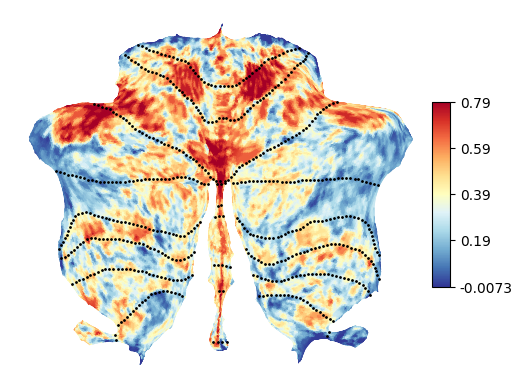

Text(0.5, 1.0, 'Adjusted Rand Index')

In [ ]:
# --- ARI ---
# Compute adjusted rand index of each voxel
ari, ari_group, ax = eva.compare_voxelwise(
    model_pair[0], model_pair[1], plot=True, method='ari')

ax.set_title('Adjusted Rand Index')




In [3]:
print(f'ARI range: {ari.min()} - {ari.max()}')


ARI range: -0.06843094527721405 - 0.7919145226478577


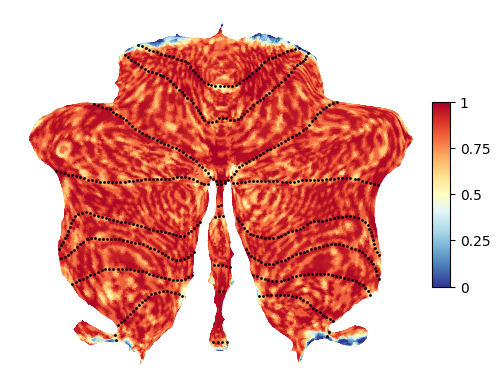

Text(0.5, 1.0, 'Rand Index')

In [9]:
ri, ax = eva.compare_voxelwise(
    model_pair[0], model_pair[1], plot=True, method='ri', lim=(0, 1))
ax.set_title('Rand Index')


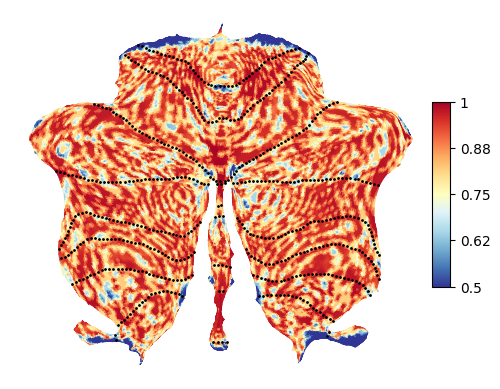

In [26]:

plt.figure()
ax = ut.plot_data_flat(ri, 'MNISymC2',
                       dtype='func',
                       render='matplotlib',
                       cmap='RdYlBu_r',
                       cscale=[0.5, 1],
                       colorbar=True)
plt.show()


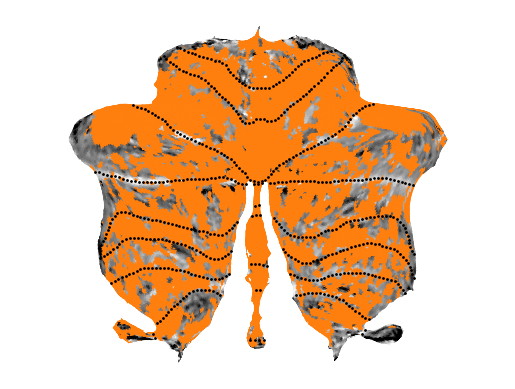

Text(0.5, 1.0, 'Match')

In [11]:
# --- Match ---
# Compute how many voxels land in the same parcel

match, ax = eva.compare_voxelwise(
    model_pair[0], model_pair[1], plot=True, method='match')
ax.set_title('Match')


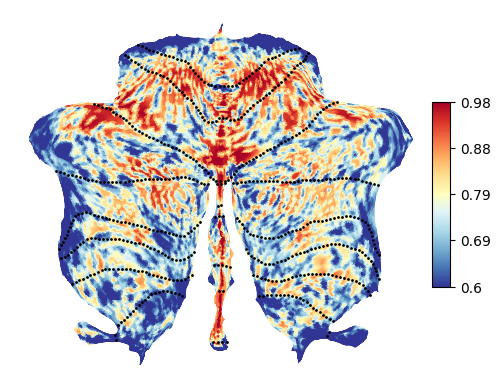

Text(0.5, 1.0, 'Correlation')

In [12]:
corr, ax = eva.compare_voxelwise(
    model_pair[0], model_pair[1], plot=True, method='corr')
ax.set_title('Correlation')


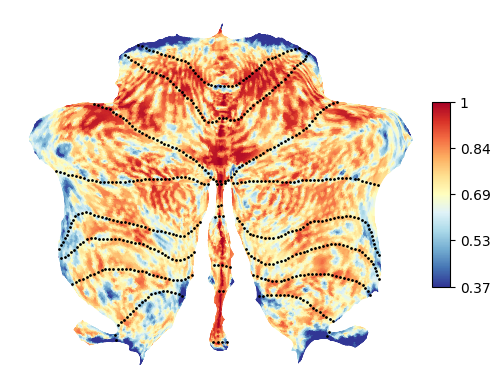

In [24]:
# Replot with limits of 0.5 to 1
plt.figure()
ax = ut.plot_data_flat(corr, 'MNISymC2',
                       dtype='func',
                       render='matplotlib',
                       cmap='RdYlBu_r',
                       cscale=[0.37, 1],
                       colorbar=True)
plt.show()


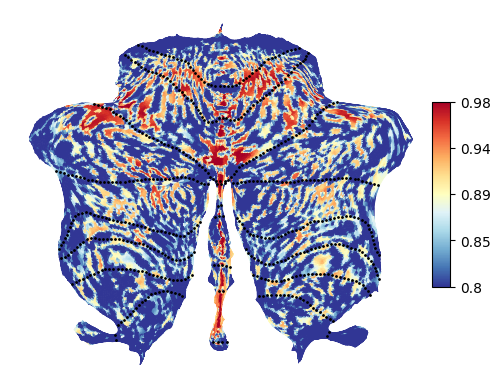

Text(0.5, 1.0, 'Cosine Angle')

In [14]:
cosang, ax = eva.compare_voxelwise(
    model_pair[0], model_pair[1], plot=True, method='cosang')
ax.set_title('Cosine Angle')


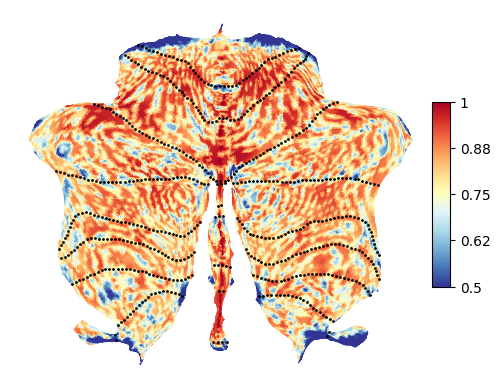

In [15]:
# Replot with limits of 0.5 to 1
plt.figure()
ax = ut.plot_data_flat(cosang, 'MNISymC2',
                       dtype='func',
                       render='matplotlib',
                       cmap='RdYlBu_r',
                       cscale=[0.5, 1],
                       colorbar=True)
plt.show()
